In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm


In [4]:
ccm_analytics= pd.read_csv('CCM_Analytics.csv')
ccm_analytics.head()

,DateOfGame,Opponent,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,...,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored,WinOrLoss
0,1/19/2021,GB SouthWest,26,11,6,3,15,9,6,2,...,1.166667,1.666667,1.333333,2,1.600000,3.000000,0.857143,6,93,Win
1,1/22/2021,Hortonville,8,7,6,0,1,6,2,2,...,0.222222,0.400000,0.428571,0,0.500000,1.500000,0.000000,7,96,Win
2,1/23/2021,Appleton West,25,15,4,12,10,4,5,0,...,1.000000,0.500000,1.615385,#DIV/0!,0.500000,1.714286,1.285714,11,99,Win
3,12/8/2020,Appleton East,40,10,10,4,30,12,8,2,...,1.210526,1.294118,0.600000,2,1.250000,0.000000,1.000000,6,86,Win
4,1/29/2021,Kimberly,20,10,8,3,10,11,4,2,...,0.666667,0.800000,1.000000,0,0.888889,1.500000,0.000000,6,65,Loss


In [5]:
ccm_analytics.isna().sum()

DateOfGame                                      0
Opponent                                        0
TotalPoint                                      0
FirstHalfPoint                                  0
FirstHalfFieldGoalAttempts                      0
FirstHalfFieldGoalsMade                         0
SecondHalfPoint                                 0
SecondHalfFieldGoalAttempts                     0
SecondHalfFieldGoalsMade                        0
FreeThrowsAttemptedFirstHalf                    0
FreeThrowsMadeFirstHalf                         0
FreeThrowsAttemptedSecondHalf                   0
FreeThrowsMadeSecondHalf                        0
FreeThrowsAttemptedTotal                        0
FreeThrowsMadeTotal                             0
FieldGoalsAttemptedTotal                        0
FieldGoalsMadeTotal                             0
2PointFieldGoalsAttemptedTotal                  0
2PointFieldGoalsMadeTotal                       0
3PointFieldGoalsAttemptedTotal                  0


In [6]:
ccm_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DateOfGame                                    5 non-null      object 
 1   Opponent                                      5 non-null      object 
 2   TotalPoint                                    5 non-null      int64  
 3   FirstHalfPoint                                5 non-null      int64  
 4   FirstHalfFieldGoalAttempts                    5 non-null      int64  
 5   FirstHalfFieldGoalsMade                       5 non-null      int64  
 6   SecondHalfPoint                               5 non-null      int64  
 7   SecondHalfFieldGoalAttempts                   5 non-null      int64  
 8   SecondHalfFieldGoalsMade                      5 non-null      int64  
 9   FreeThrowsAttemptedFirstHalf                  5 non-null      int64  

In [7]:
#Replace #DIV/0! error with 0
ccm_analytics = ccm_analytics.replace('#DIV/0!', 0)

In [8]:
ccm_analytics.describe().columns

Index(['TotalPoint', 'FirstHalfPoint', 'FirstHalfFieldGoalAttempts',
       'FirstHalfFieldGoalsMade', 'SecondHalfPoint',
       'SecondHalfFieldGoalAttempts', 'SecondHalfFieldGoalsMade',
       'FreeThrowsAttemptedFirstHalf', 'FreeThrowsMadeFirstHalf',
       'FreeThrowsAttemptedSecondHalf', 'FreeThrowsMadeSecondHalf',
       'FreeThrowsAttemptedTotal', 'FreeThrowsMadeTotal',
       'FieldGoalsAttemptedTotal', 'FieldGoalsMadeTotal',
       '2PointFieldGoalsAttemptedTotal', '2PointFieldGoalsMadeTotal',
       '3PointFieldGoalsAttemptedTotal', '3PointFieldGoalsMadeTotal',
       'FieldGoalsAttemptedOpenTotal', 'FieldGoalsMadeOpenTotal',
       'FieldGoalsAttemptedGuardedTotal', 'FieldGoalsMadeGuardedTotal',
       '2PointFieldGoalsAttemptedOpenTotal', '2PointFieldGoalsMadeOpenTotal',
       '2PointFieldGoalsAttemptedGuardedTotal',
       '2PointFieldGoalsMadeGuardedTotal ',
       '3PointFieldGoalsAttemptedOpenTotal', '3PointFieldGoalsMadeOpenTotal',
       '3PointFieldGoalsAttemptetGua

In [9]:
#Seperate Numerical and Categorical data
df_num = ccm_analytics.drop(columns = ['DateOfGame', 'Opponent', 'WinOrLoss'])
df_num

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored
0,26,11,6,3,15,9,6,2,2,2,...,2.666667,1.166667,1.666667,1.333333,2,1.600000,3.000000,0.857143,6,93
1,8,7,6,0,1,6,2,2,2,2,...,1.000000,0.222222,0.400000,0.428571,0,0.500000,1.500000,0.000000,7,96
2,25,15,4,12,10,4,5,0,0,3,...,1.714286,1.000000,0.500000,1.615385,0,0.500000,1.714286,1.285714,11,99
3,40,10,10,4,30,12,8,2,2,13,...,0.666667,1.210526,1.294118,0.600000,2,1.250000,0.000000,1.000000,6,86
4,20,10,8,3,10,11,4,2,2,1,...,1.285714,0.666667,0.800000,1.000000,0,0.888889,1.500000,0.000000,6,65


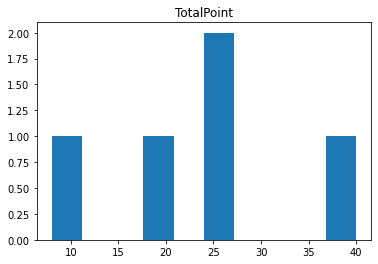

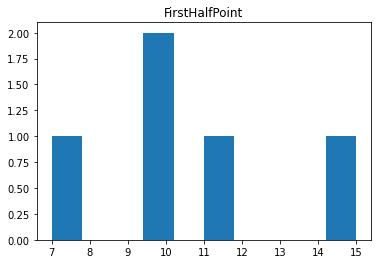

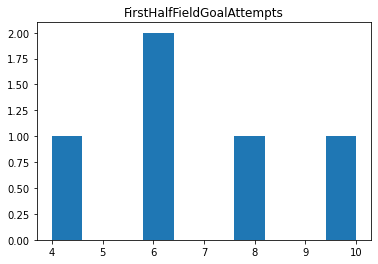

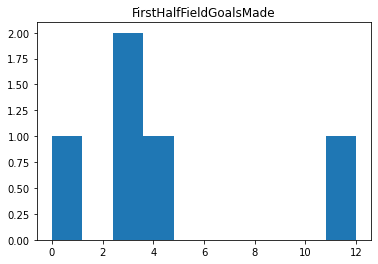

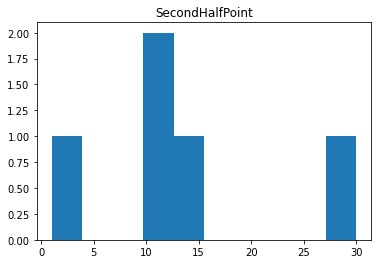

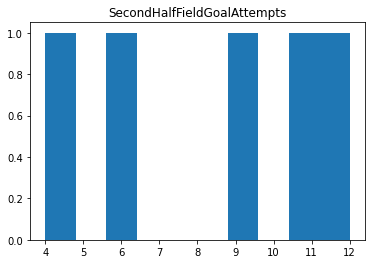

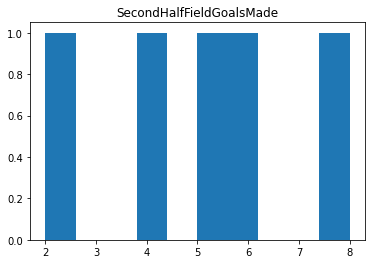

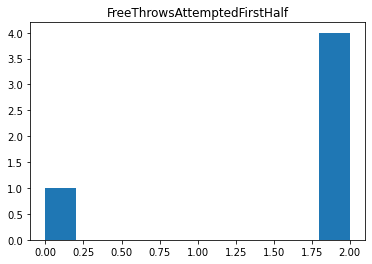

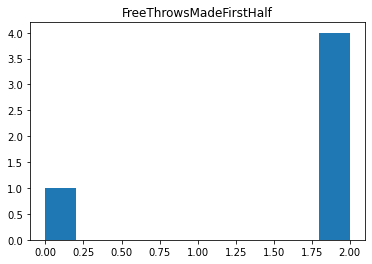

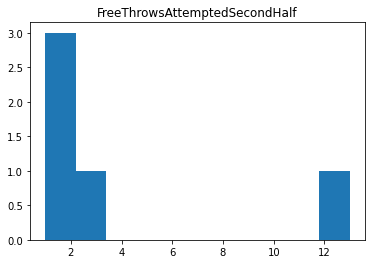

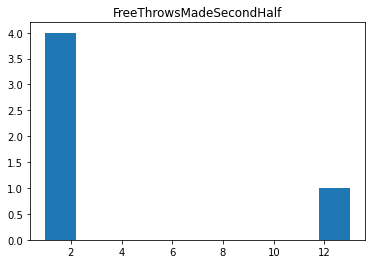

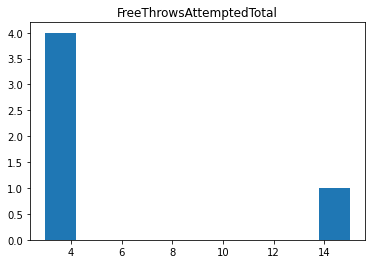

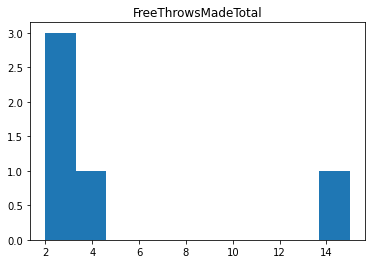

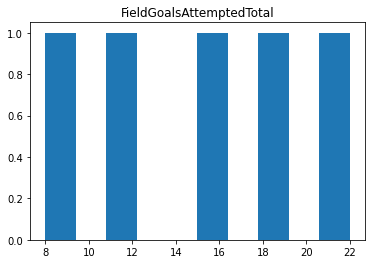

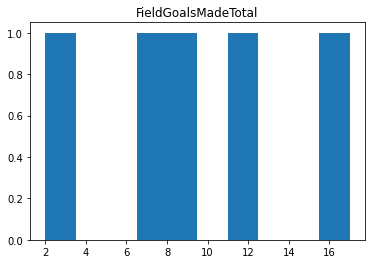

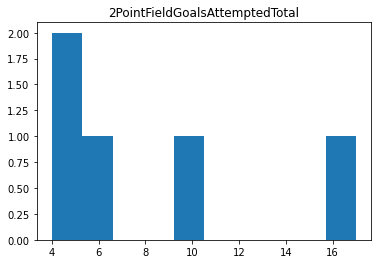

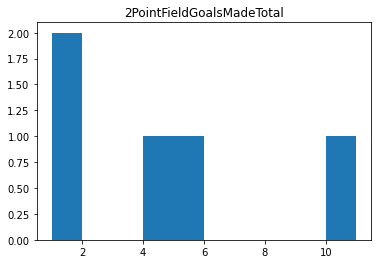

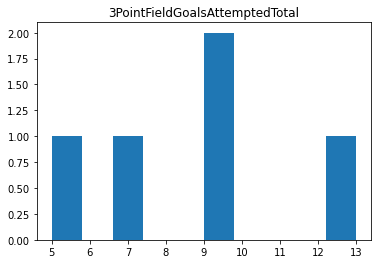

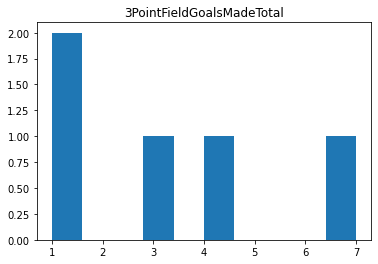

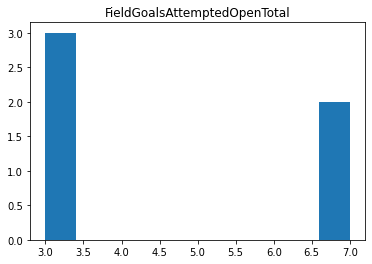

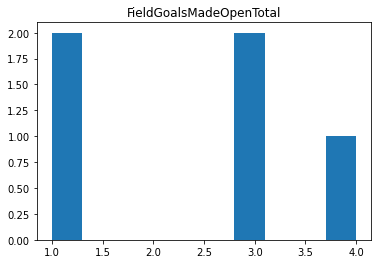

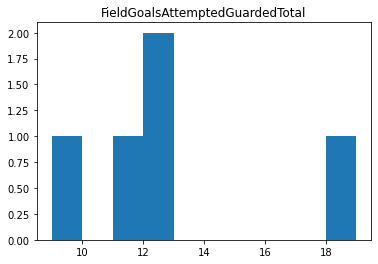

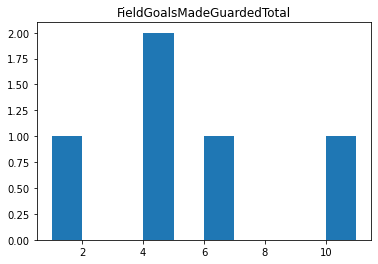

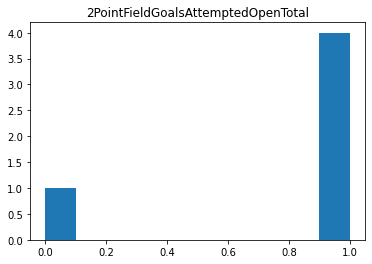

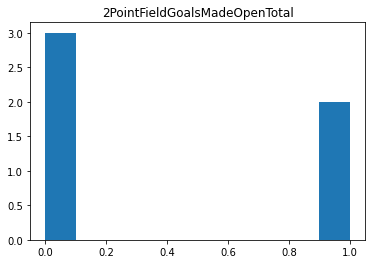

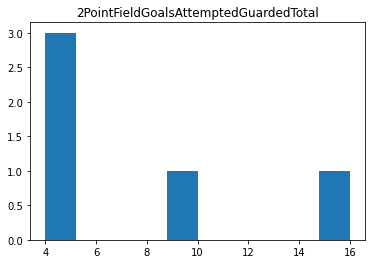

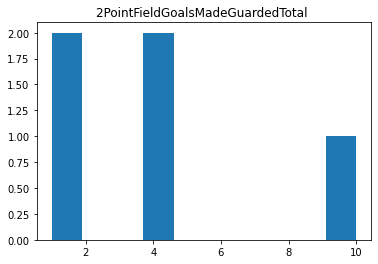

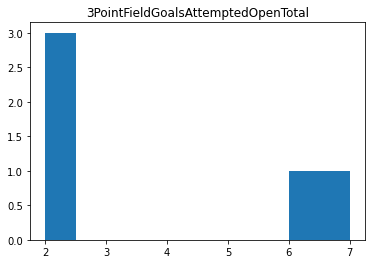

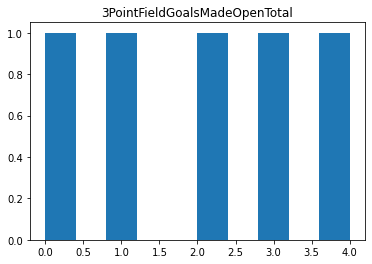

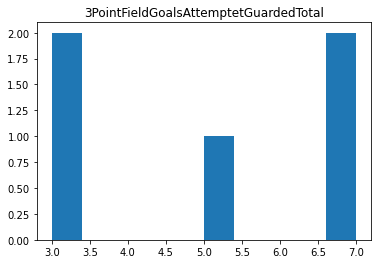

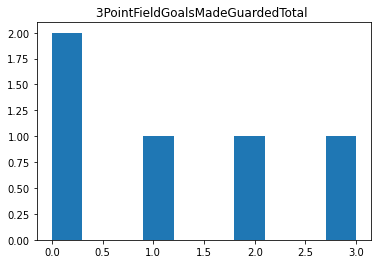

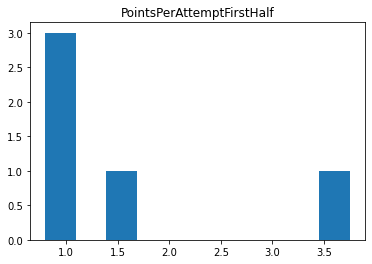

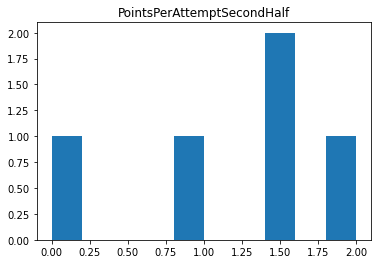

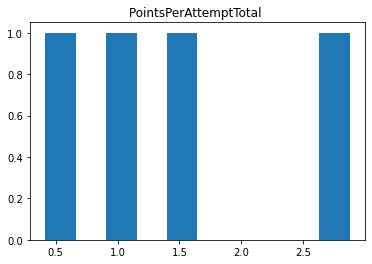

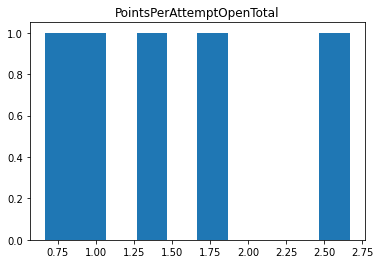

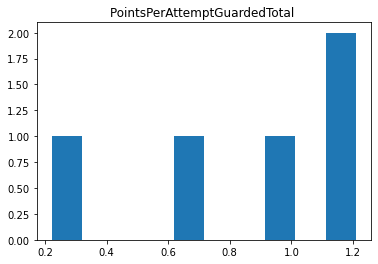

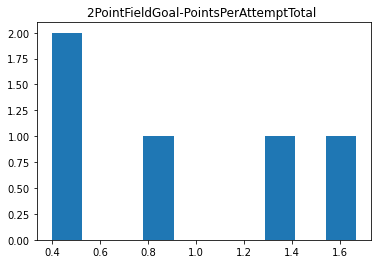

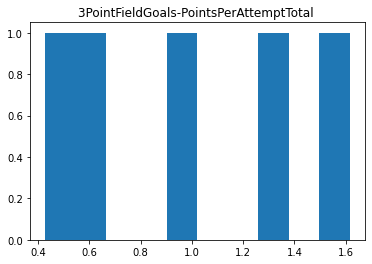

TypeError: 'value' must be an instance of str or bytes, not a int

In [10]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

array([[<AxesSubplot:xlabel='TotalPoint', ylabel='TotalPoint'>,
        <AxesSubplot:xlabel='FirstHalfPoint', ylabel='TotalPoint'>],
       [<AxesSubplot:xlabel='TotalPoint', ylabel='FirstHalfPoint'>,
        <AxesSubplot:xlabel='FirstHalfPoint', ylabel='FirstHalfPoint'>]],
      dtype=object)

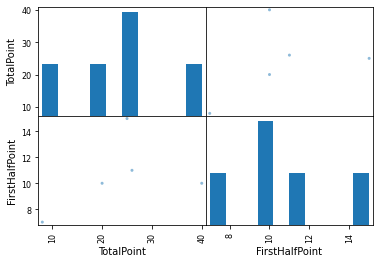

In [11]:
#Scatter Plots
pd.plotting.scatter_matrix(df_num[['TotalPoint', 'FirstHalfPoint']])

<AxesSubplot:>

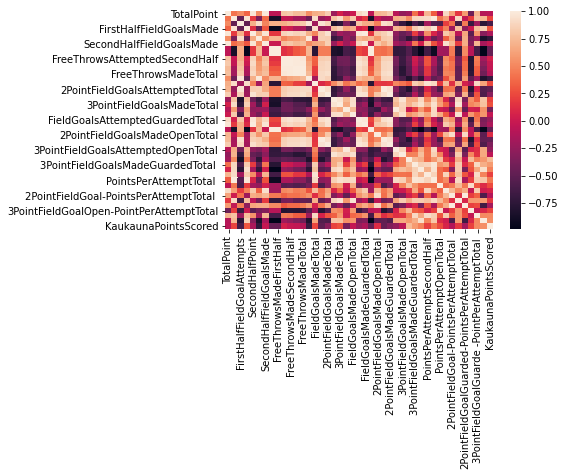

In [12]:
#Heat map correlations
shooting_correlation = df_num.corr()
sns.heatmap(shooting_correlation)

In [13]:
#Find correlations
shooting_correlation

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptTotal,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarde -PointPerAttemptTotal,Assists,KaukaunaPointsScored
TotalPoint,1.000000,0.418046,0.520555,0.357695,0.969411,0.530977,9.881049e-01,-5.812382e-02,-5.812382e-02,0.798482,...,0.318165,-0.054958,0.910325,0.638984,0.176281,0.590952,-0.421905,0.715569,-0.097919,-0.075028
FirstHalfPoint,0.418046,1.000000,-0.471868,0.959141,0.182292,-0.366564,3.880753e-01,-8.537656e-01,-8.537656e-01,-0.027937,...,0.994307,0.430706,0.618645,0.027450,0.902530,-0.044000,0.199048,0.788623,0.736495,0.233064
FirstHalfFieldGoalAttempts,0.520555,-0.471868,1.000000,-0.476921,0.690919,0.926227,4.902903e-01,6.864065e-01,6.864065e-01,0.688247,...,-0.532902,-0.575205,0.202703,0.417275,-0.624164,0.453852,-0.679424,-0.200322,-0.748430,-0.604993
FirstHalfFieldGoalsMade,0.357695,0.959141,-0.476921,1.000000,0.128011,-0.475385,2.977750e-01,-9.429542e-01,-9.429542e-01,0.051357,...,0.973775,0.202966,0.480468,-0.199140,0.773249,-0.275696,0.006699,0.763071,0.859968,0.302942
SecondHalfPoint,0.969411,0.182292,0.690919,0.128011,1.000000,0.673748,9.646341e-01,1.677624e-01,1.677624e-01,0.871793,...,0.072697,-0.175854,0.818152,0.684195,-0.053049,0.651511,-0.510433,0.561431,-0.304972,-0.144178
SecondHalfFieldGoalAttempts,0.530977,-0.366564,0.926227,-0.475385,0.673748,1.000000,5.321521e-01,7.317091e-01,7.317091e-01,0.487832,...,-0.447374,-0.250057,0.335014,0.632911,-0.387832,0.677397,-0.380090,-0.193109,-0.837031,-0.718209
SecondHalfFieldGoalsMade,0.988105,0.388075,0.490290,0.297775,0.964634,0.532152,1.000000e+00,1.387779e-17,1.387779e-17,0.764866,...,0.278058,0.055079,0.939265,0.737481,0.191826,0.689859,-0.314945,0.725764,-0.154713,-0.016409
FreeThrowsAttemptedFirstHalf,-0.058124,-0.853766,0.686406,-0.942954,0.167762,0.731709,1.387779e-17,1.000000e+00,1.000000e+00,0.134976,...,-0.905287,-0.179008,-0.198950,0.449008,-0.701484,0.521601,-0.089984,-0.618244,-0.979850,-0.459449
FreeThrowsMadeFirstHalf,-0.058124,-0.853766,0.686406,-0.942954,0.167762,0.731709,1.387779e-17,1.000000e+00,1.000000e+00,0.134976,...,-0.905287,-0.179008,-0.198950,0.449008,-0.701484,0.521601,-0.089984,-0.618244,-0.979850,-0.459449
FreeThrowsAttemptedSecondHalf,0.798482,-0.027937,0.688247,0.051357,0.871793,0.487832,7.648662e-01,1.349764e-01,1.349764e-01,1.000000,...,-0.139306,-0.544572,0.520024,0.344201,-0.380272,0.307704,-0.791498,0.454733,-0.190264,0.052417


In [15]:
#Pivot table to see assits and point spread in first and second half
pd.pivot_table(ccm_analytics, index = 'TotalPoint', values = ['Assists', 'FirstHalfPoint', 'SecondHalfPoint'])

,Assists,FirstHalfPoint,SecondHalfPoint
TotalPoint,,,
8,7,7,1
20,6,10,10
25,11,15,10
26,6,11,15
40,6,10,30


In [18]:
# Going to machine learn to predict total points based on first half stats
y = ccm_analytics.TotalPoint
y


0    26
1     8
2    25
3    40
4    20
Name: TotalPoint, dtype: int64

In [19]:
# What to use from data to predict total points
ccm_features = ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf']

In [20]:
# Look at data to be used in prediction
X = ccm_analytics[ccm_features]
X.describe()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
count,5.000000,5.000000,5.000000,5.000000
mean,10.600000,6.800000,1.600000,1.576667
std,2.880972,2.280351,0.894427,1.246751
min,7.000000,4.000000,0.000000,0.800000
25%,10.000000,6.000000,2.000000,0.833333
50%,10.000000,6.000000,2.000000,1.000000
75%,11.000000,8.000000,2.000000,1.500000
max,15.000000,10.000000,2.000000,3.750000


In [21]:
# Look at first 5 values of prediction values
X.head()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
0,11,6,2,1.500000
1,7,6,2,0.833333
2,15,4,0,3.750000
3,10,10,2,0.800000
4,10,8,2,1.000000


In [23]:
# Used Decision Tree Regressor to split prediction values
from sklearn.tree import DecisionTreeRegressor
ccm_model = DecisionTreeRegressor(random_state = 1)
ccm_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [24]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predicitions are")
print(ccm_model.predict(X.head()))

Making predictions for the following 5 houses:
   FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
0              11                           6                             2   
1               7                           6                             2   
2              15                           4                             0   
3              10                          10                             2   
4              10                           8                             2   

   PointsPerAttemptFirstHalf  
0                   1.500000  
1                   0.833333  
2                   3.750000  
3                   0.800000  
4                   1.000000  
The predicitions are
[26.  8. 25. 40. 20.]


In [25]:
y.head()

0    26
1     8
2    25
3    40
4    20
Name: TotalPoint, dtype: int64